In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline


/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
in_dir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/scanpy_data_v2/'
name = 'sce_merged_afterqc_filt_allexpts_exprs_20180618.day0'

In [3]:
file = in_dir + name + '.scanpy.dimreduction.harmonyPCA.clustered.h5'
adata_clustered = sc.read(file)

file = in_dir + name + '.scanpy.h5'
adatafull = sc.read(file)

#in_dir = os.path.dirname(file)

adatafull.obs['cluster_id'] = adata_clustered.obs['louvain'].astype(str)
adatafull.obsm['X_umap'] = adata_clustered.obsm['X_umap']

Only considering the two last: ['.clustered', '.h5'].
Only considering the two last: ['.clustered', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [4]:
# file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/scanpy_data_v2/sce_merged_afterqc_filt_allexpts_exprs_20180618.day0.scanpy.dimreduction.harmonyPCA.clustered.h5'

In [5]:
# adatafull = sc.read(file)

In [6]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

adata.raw = adata
# selected_pools = ['pool10','pool11','pool12']
# adata = adatafull[adatafull.obs['pool_id'].isin(selected_pools),: ]

In [19]:
adata.obs.to_csv('/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/Cuomo_metadata.csv')
adata.obsm.to_df().to_csv('/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/Cuomo_umap.csv')

In [7]:
adata.var['gene_symbol'] = [x.split('_')[1] for x in adata.var.index]

mapping_df = adata.var.copy().reset_index().set_index('gene_symbol')

mapping_df.head()

index
gene_symbol                          
TSPAN6         ENSG00000000003_TSPAN6
DPM1             ENSG00000000419_DPM1
SCYL3           ENSG00000000457_SCYL3
C1orf112     ENSG00000000460_C1orf112
FUCA2           ENSG00000001036_FUCA2

In [8]:
# mapping_df[mapping_df['gene_symbol'] == 'NANOG',:]
mapping_df['index']

gene_symbol
TSPAN6        ENSG00000000003_TSPAN6
DPM1            ENSG00000000419_DPM1
SCYL3          ENSG00000000457_SCYL3
C1orf112    ENSG00000000460_C1orf112
FUCA2          ENSG00000001036_FUCA2
                      ...           
MTRNR2L2    ENSG00000271043_MTRNR2L2
SRXN1          ENSG00000271303_SRXN1
GTF2H5        ENSG00000272047_GTF2H5
NUDT3          ENSG00000272325_NUDT3
CD24            ENSG00000272398_CD24
Name: index, Length: 11231, dtype: object

In [9]:
fig_format = 'png'
# fig_format = 'pdf'
sc.set_figure_params(dpi_save=200,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 6,4

In [10]:
plotting_fcn = sc.pl.umap

In [11]:
# adata.obs

In [12]:
# adata.obs['cluster_id'] = adata.obs['louvain'].apply(lambda x : str(int(x)))

... storing 'cluster_id' as categorical


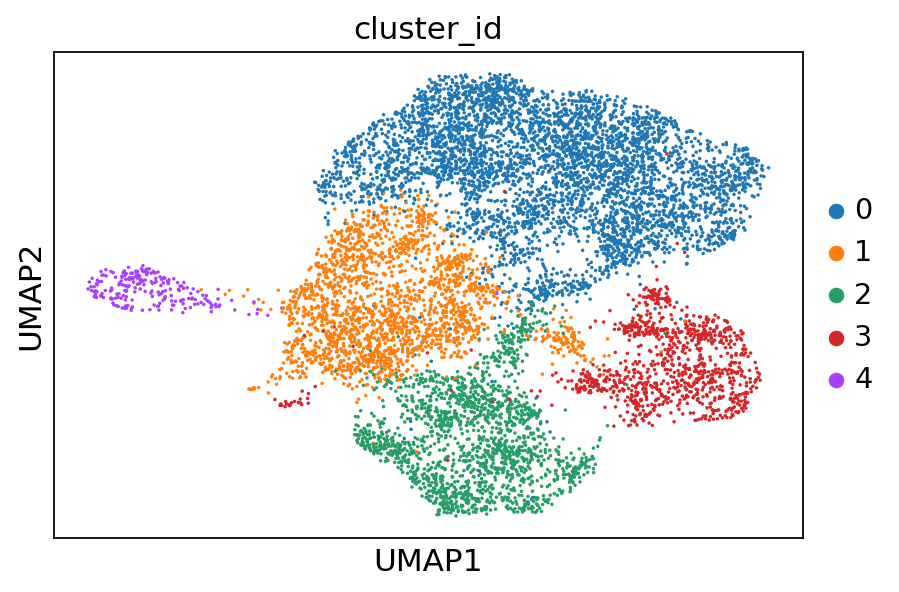

In [13]:
plotting_fcn(adata, color='cluster_id', size=10)

In [14]:
adata.obs['cluster_id'].cat.categories

Index(['0', '1', '2', '3', '4'], dtype='object')

In [15]:
adata.uns['cluster_id_colors']

['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc']

In [16]:
adata.uns['cluster_id_colors'][0] = '#9467bd'
adata.uns['cluster_id_colors'][1] = '#9467bd'
adata.uns['cluster_id_colors'][2] = '#ff7f0e'
adata.uns['cluster_id_colors'][3] = '#9467bd'
adata.uns['cluster_id_colors'][4] = '#9467bd'

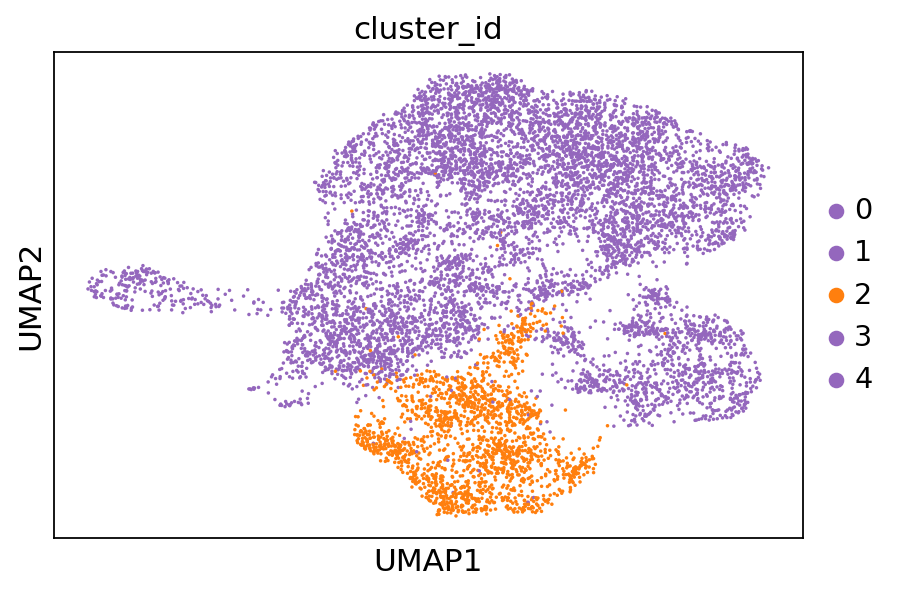

In [17]:
plotting_fcn(adata, color='cluster_id',size=10)

In [18]:
adata.var['gene_symbol'] = [x.split('_')[1] for x in adata.var.index]

mapping_df = adata.var.copy().reset_index().set_index('gene_symbol')

mapping_df.head()

index
gene_symbol                          
TSPAN6         ENSG00000000003_TSPAN6
DPM1             ENSG00000000419_DPM1
SCYL3           ENSG00000000457_SCYL3
C1orf112     ENSG00000000460_C1orf112
FUCA2           ENSG00000001036_FUCA2

In [19]:
adata.var['gene_symbol']

index
ENSG00000000003_TSPAN6        TSPAN6
ENSG00000000419_DPM1            DPM1
ENSG00000000457_SCYL3          SCYL3
ENSG00000000460_C1orf112    C1orf112
ENSG00000001036_FUCA2          FUCA2
                              ...   
ENSG00000271043_MTRNR2L2    MTRNR2L2
ENSG00000271303_SRXN1          SRXN1
ENSG00000272047_GTF2H5        GTF2H5
ENSG00000272325_NUDT3          NUDT3
ENSG00000272398_CD24            CD24
Name: gene_symbol, Length: 11231, dtype: object

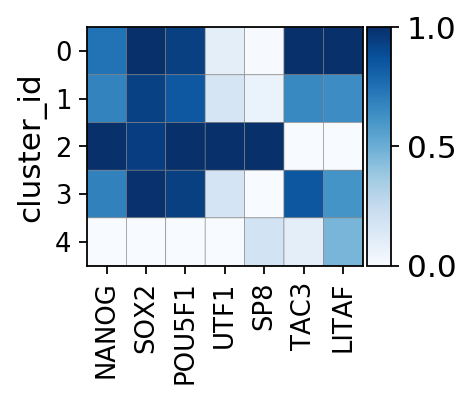

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[2.24, 0, 0.2])

In [24]:
gene_list = ['NANOG','SOX2','POU5F1','UTF1','SP8','PDGFA']
gene_list = ['NANOG','SOX2','POU5F1','UTF1','SP8','TAC3','LITAF']
    
sc.pl.matrixplot(adata, var_names=gene_list, gene_symbols='gene_symbol', groupby='cluster_id', standard_scale='var', cmap='Blues')

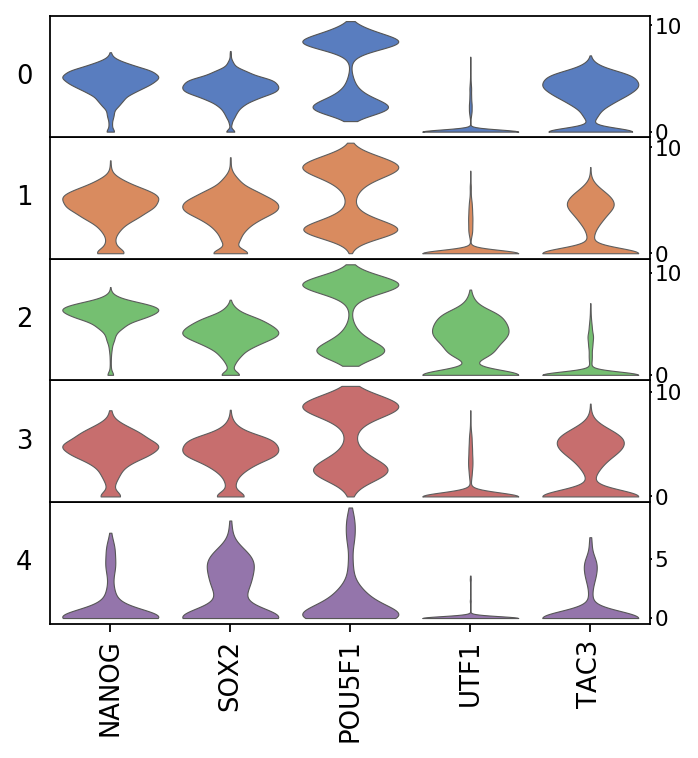

In [28]:
gene_list = ['NANOG','SOX2','POU5F1','UTF1','SP8','TAC3']
gene_list = ['NANOG','SOX2','POU5F1','UTF1','TAC3']

sc.pl.stacked_violin(adata, gene_list, gene_symbols='gene_symbol', groupby='cluster_id',
                     figsize=(5,5))

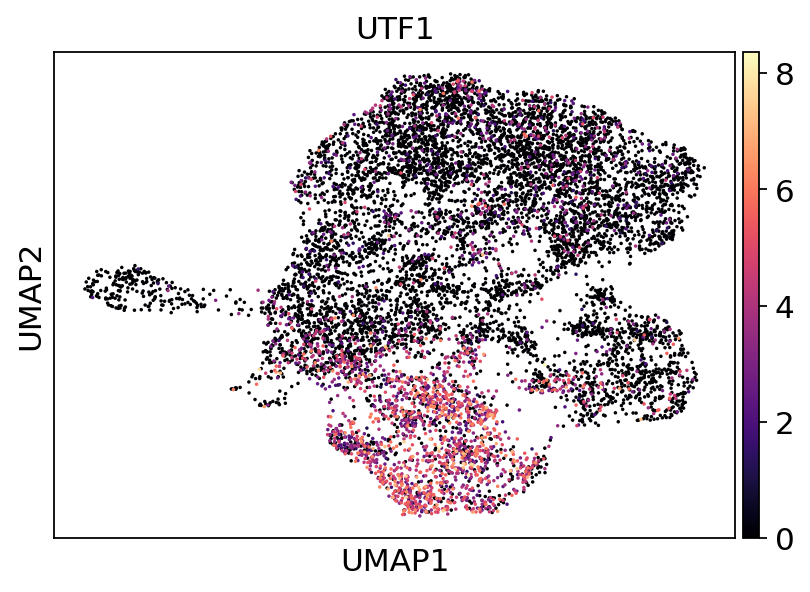

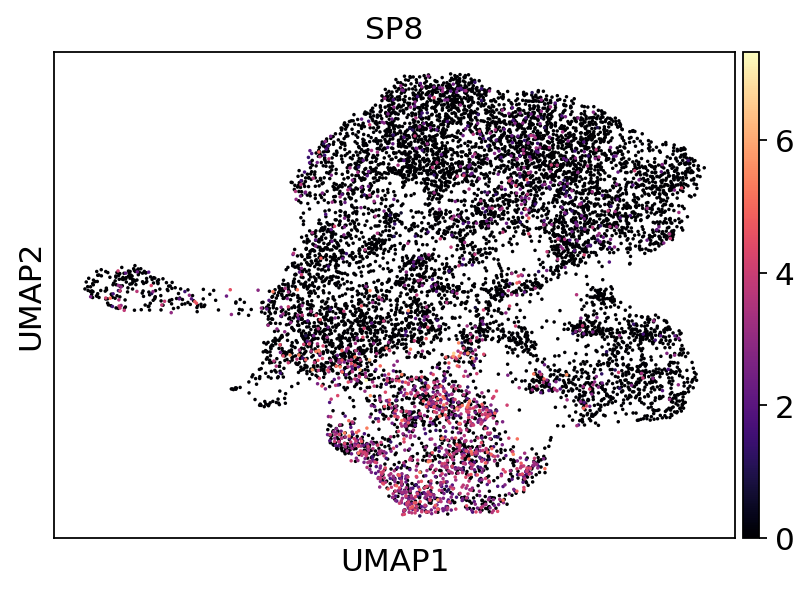

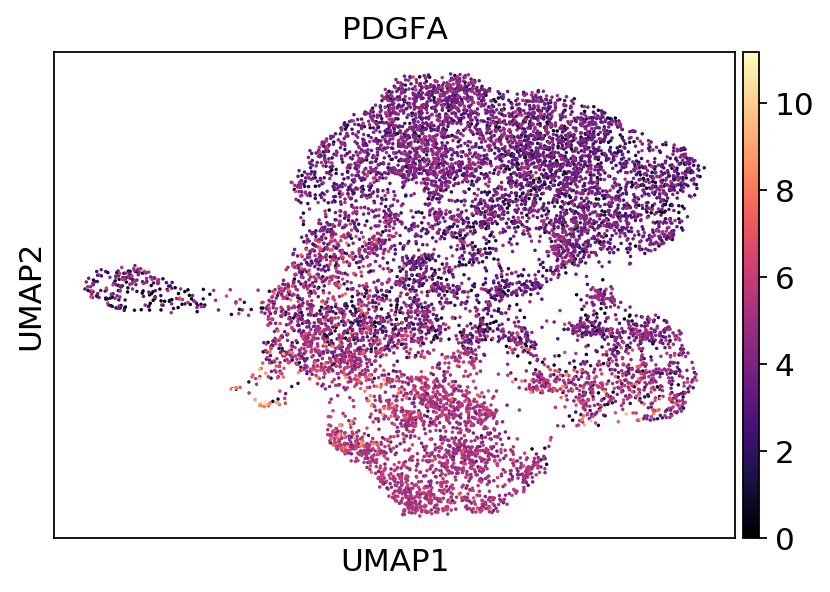

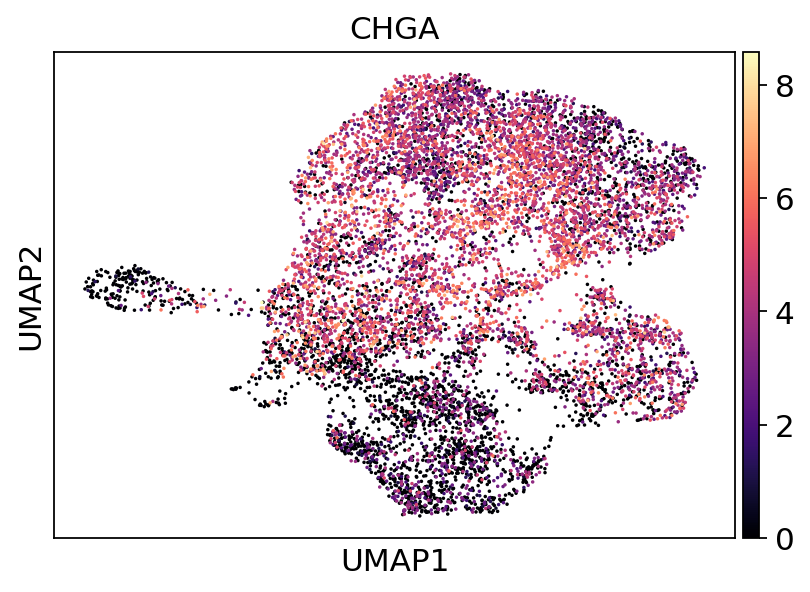

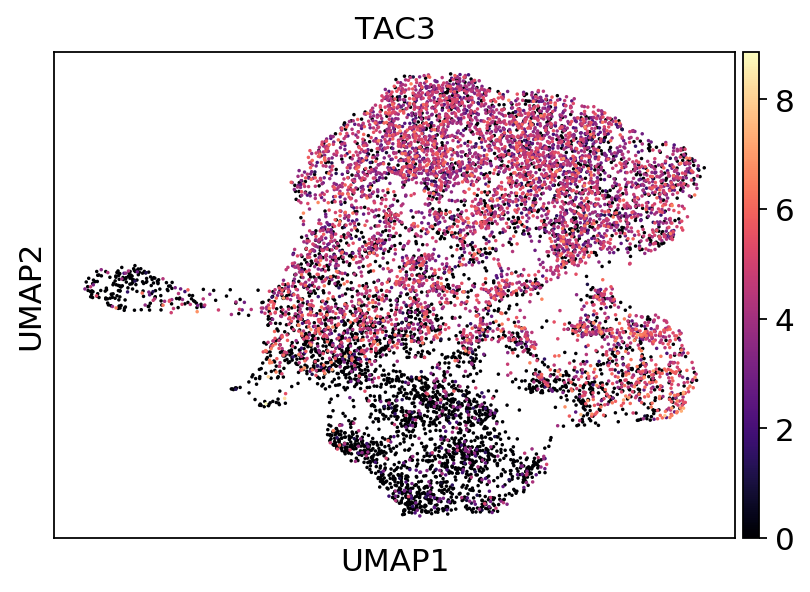

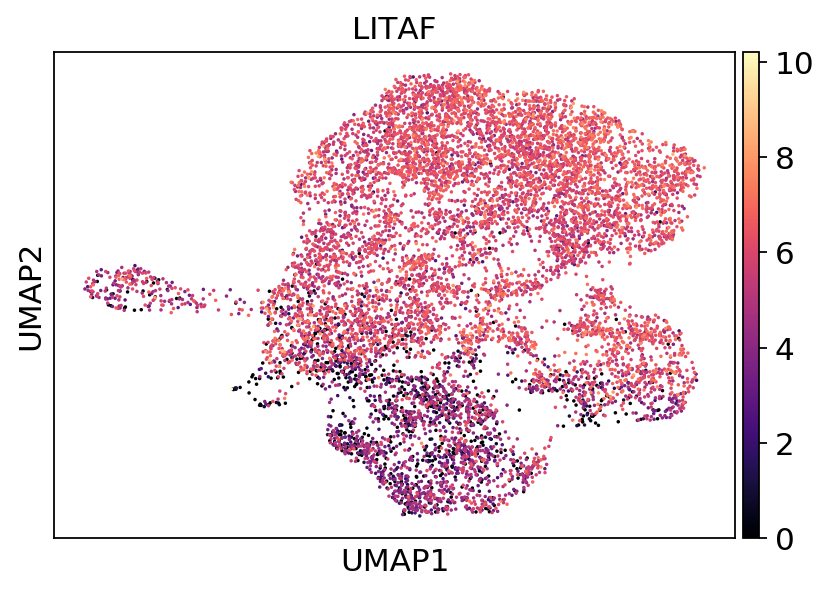

In [79]:
gene_list = ['UTF1','SP8','PDGFA','CHGA','TAC3','LITAF']

for gene in gene_list[:]:
    try:
#         gene = mapping_df.loc[gene,'index']
        plotting_fcn(adata, color=[gene], use_raw=True, gene_symbols='gene_symbol', color_map='magma', size=10)
    except:
        print(gene)

rcParams['figure.figsize'] = 6,4

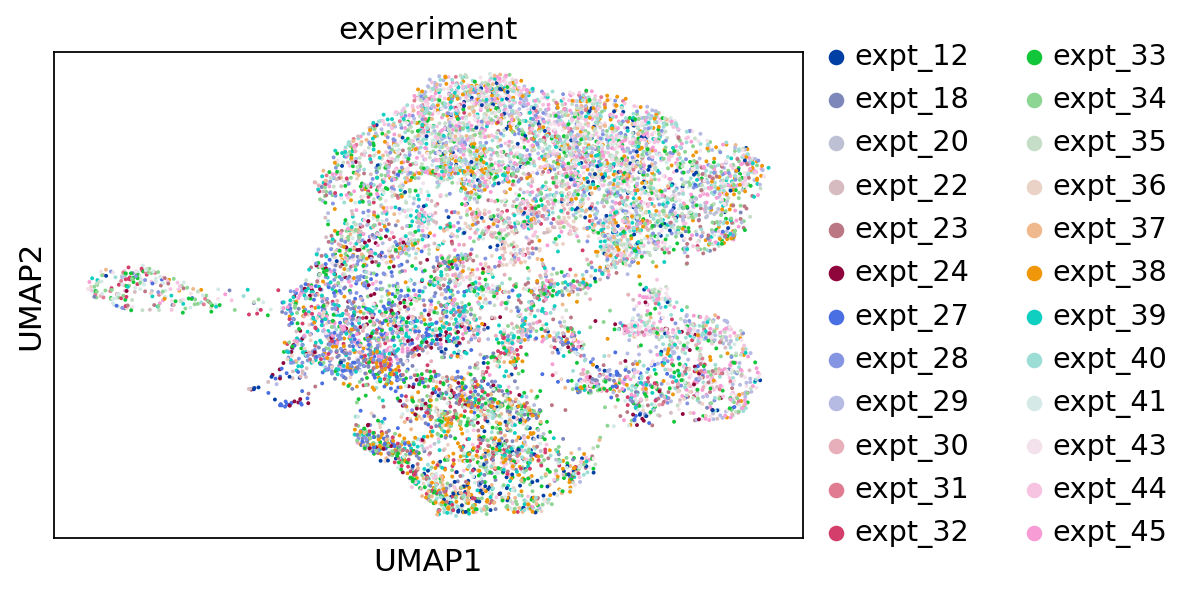

In [80]:
plotting_fcn(adata, color='experiment')

In [93]:
df = adata.obs.groupby(['donor_long_id','experiment','cluster_id'])[['day']].count().fillna(0.0).rename(columns={'day':'count'})
total_counts = adata.obs.groupby(['donor_long_id','experiment'])[['day']].count().rename(columns={'day':'total_count'})

df = df.reset_index()

#.join(donor_total_counts)

df['f_cells'] = df.apply(lambda x: x['count']/total_counts.loc[(x['donor_long_id'],x['experiment']),'total_count'], axis=1)

df = df.dropna()
df.head()

donor_long_id experiment cluster_id  count   f_cells
90  HPSI0114i-bezi_1    expt_39          0    7.0  0.538462
91  HPSI0114i-bezi_1    expt_39          1    6.0  0.461538
92  HPSI0114i-bezi_1    expt_39          2    0.0  0.000000
93  HPSI0114i-bezi_1    expt_39          3    0.0  0.000000
94  HPSI0114i-bezi_1    expt_39          4    0.0  0.000000

In [94]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"

filename = mydir + 'Cuomo_cluster_cell_fractions_by_donor_experiment.csv'
df.to_csv(filename)

In [81]:
# sc.pp.filter_genes(adata, min_cells=100)
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.scale(adata)

In [82]:
sc.tl.rank_genes_groups(adata, groupby='cluster_id', n_genes=1e6)

In [83]:
# adata.uns['rank_genes_groups']

In [84]:
# group_names = pval_df.columns
group_names = [str(x) for x in range(5)]
df_list = []
for group_name in group_names:
    column_names = ['names','pvals','pvals_adj','logfoldchanges','scores']
    data = [pd.DataFrame(adata.uns['rank_genes_groups'][col])[group_name] for col in column_names]
    temp_df = pd.DataFrame(data, index=column_names).transpose()
    temp_df['cluster_id'] = group_name
    df_list.append(temp_df)
    
diff_expression_df = pd.concat(df_list)

diff_expression_df['ensembl_gene_id'] = diff_expression_df['names'].apply(lambda x: x.split('_')[0])
diff_expression_df['hgnc_symbol'] = diff_expression_df['names'].apply(lambda x: x.split('_')[1])

diff_expression_df.head()

names pvals pvals_adj logfoldchanges   scores cluster_id  \
0    ENSG00000171724_VAT1L     0         0        2.52926  45.2793          0   
1   ENSG00000165349_SLC7A3     0         0        1.87141  45.1813          0   
2    ENSG00000189067_LITAF     0         0        2.15124  41.0095          0   
3    ENSG00000154277_UCHL1     0         0       0.806345  40.1568          0   
4  ENSG00000155380_SLC16A1     0         0       0.933527  40.0874          0   

   ensembl_gene_id hgnc_symbol  
0  ENSG00000171724       VAT1L  
1  ENSG00000165349      SLC7A3  
2  ENSG00000189067       LITAF  
3  ENSG00000154277       UCHL1  
4  ENSG00000155380     SLC16A1

In [85]:
(diff_expression_df
 .query('pvals_adj<0.0001 & cluster_id=="2"')
 .sort_values(by='logfoldchanges', ascending=False)
 .head(20))

names         pvals     pvals_adj logfoldchanges  \
7      ENSG00000159182_PRAC1  3.77903e-232  3.26479e-229        6.29562   
0       ENSG00000152977_ZIC1             0             0        5.22355   
1       ENSG00000171794_UTF1  4.88835e-309  1.37253e-305        5.16124   
5      ENSG00000164093_PITX2  5.48702e-248  7.37992e-245        5.06707   
4       ENSG00000198417_MT1F  7.00495e-293  1.57345e-289        4.93995   
6       ENSG00000184302_SIX6  3.06343e-254  5.73422e-251        4.49813   
8       ENSG00000138083_SIX3   4.9854e-238  5.09009e-235        4.34059   
2       ENSG00000168505_GBX2  8.17971e-318  4.59332e-314        4.33813   
60      ENSG00000125144_MT1G  3.29624e-120   4.3553e-118        4.18382   
11      ENSG00000125148_MT2A  1.83924e-222  1.47547e-219        4.15596   
25       ENSG00000164651_SP8  1.64683e-172  4.74243e-170        3.94056   
115      ENSG00000133937_GSC   1.33952e-73     8.045e-72        3.89965   
46      ENSG00000152804_HHEX  9.35275e-132   1.4589e-129        3.89054   
54      ENSG00000053438_NNAT  6.20919e-126  8.94044e-124        3.63846   
3     ENSG00000087510_TFAP2C  9.54333e-315   3.5727e-311        3.61999   
15      ENSG00000173673_HES3  1.58071e-204  8.87646e-202         3.5758   
982    ENSG00000203883_SOX18   7.45872e-12   4.39962e-11        3.50754   
326     ENSG00000158856_DMTN   1.87537e-34   3.68866e-33        3.46468   
36   ENSG00000095596_CYP26A1  3.47036e-149  6.95994e-147        3.46107   
131     ENSG00000107831_FGF8    2.1203e-66   1.10246e-64        3.42596   

      scores cluster_id  ensembl_gene_id hgnc_symbol  
7    36.9238          2  ENSG00000159182       PRAC1  
0    44.3269          2  ENSG00000152977        ZIC1  
1    42.9523          2  ENSG00000171794        UTF1  
5    37.9104          2  ENSG00000164093       PITX2  
4    40.3339          2  ENSG00000198417        MT1F  
6    37.5778          2  ENSG00000184302        SIX6  
8    36.7702          2  ENSG00000138083        SIX3  
2    42.7076          2  ENSG00000168505        GBX2  
60   24.2606          2  ENSG00000125144        MT1G  
11   34.2799          2  ENSG00000125148        MT2A  
25   30.3183          2  ENSG00000164651         SP8  
115  18.8492          2  ENSG00000133937         GSC  
46   26.0794          2  ENSG00000152804        HHEX  
54   24.8694          2  ENSG00000053438        NNAT  
3    42.2187          2  ENSG00000087510      TFAP2C  
15   32.6481          2  ENSG00000173673        HES3  
982  6.88753          2  ENSG00000203883       SOX18  
326  12.4575          2  ENSG00000158856        DMTN  
36    27.633          2  ENSG00000095596     CYP26A1  
131  17.7764          2  ENSG00000107831        FGF8

In [86]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"

In [87]:
diff_exp_file = mydir + 'Cuomo2020' + '.cluster_expression_markers.tsv'

diff_expression_df.to_csv(diff_exp_file, sep='\t', index=False)
diff_expression_df.query('cluster_id=="0"').to_csv(diff_exp_file.replace('.tsv','.cluster0.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="1"').to_csv(diff_exp_file.replace('.tsv','.cluster1.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="2"').to_csv(diff_exp_file.replace('.tsv','.cluster2.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="3"').to_csv(diff_exp_file.replace('.tsv','.cluster3.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="4"').to_csv(diff_exp_file.replace('.tsv','.cluster4.tsv'), sep='\t', index=False)

In [88]:
test_file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/expression_associations.f_cells.tsv'

test_df = pd.read_csv(test_file, sep='\t')
test_df = test_df.set_index('hgnc_symbol').drop(['ensembl_gene_id'], axis=1)

test_df.head()

coef          pval      pval_adj
hgnc_symbol                                      
PDGFA       -0.554211  1.376734e-14  1.855149e-10
ZIC1        -0.539117  9.515179e-14  6.410852e-10
SP8         -0.528645  3.441941e-13  1.546005e-09
UTF1        -0.498850  1.058444e-11  3.412170e-08
SLC16A12    -0.497210  1.266111e-11  3.412170e-08

           R
0   0.385065
1  0.0353318
2  -0.582227
3  0.0815992
4  0.0181723


Text(0, 0.5, 'Correlation of cluster markers\nwith differentiation efficiency')

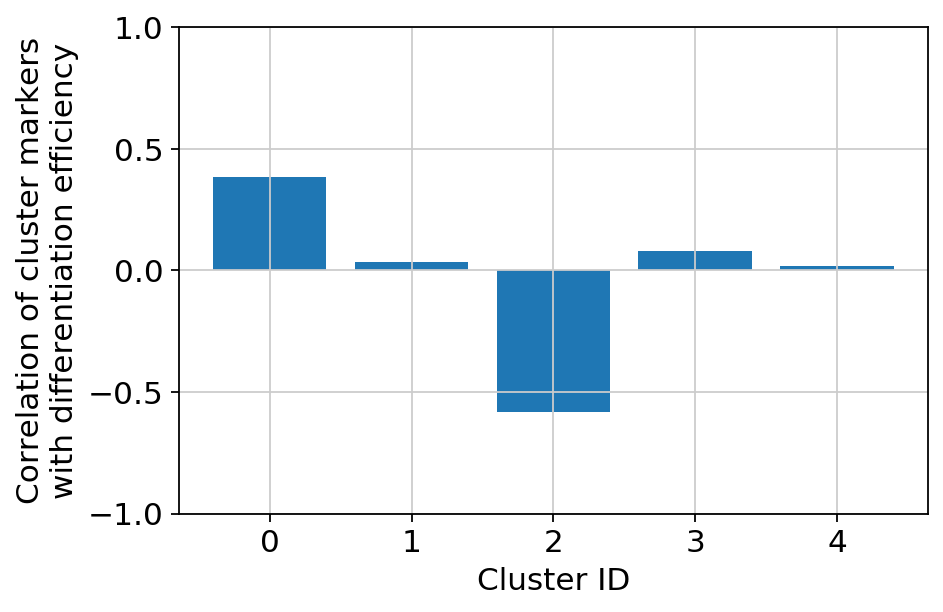

In [89]:
cross_corr_df = pd.DataFrame(index=group_names, columns=['R'])

for cluster_id in group_names:
    df = test_df.join(diff_expression_df.query('cluster_id==@cluster_id').set_index('hgnc_symbol'),how='inner')
    R,p = scipy.stats.pearsonr(df['coef'], df['logfoldchanges'])
    cross_corr_df.loc[cluster_id, 'R'] = R
    
print(cross_corr_df)

bar(range(cross_corr_df.shape[0]), cross_corr_df['R'])
ylim([-1.0,1.0])
xlabel('Cluster ID')
ylabel('Correlation of cluster markers\nwith differentiation efficiency')

                 coef          pval      pval_adj                  names  \
hgnc_symbol                                                                
PDGFA       -0.554211  1.376734e-14  1.855149e-10  ENSG00000197461_PDGFA   
ZIC1        -0.539117  9.515179e-14  6.410852e-10   ENSG00000152977_ZIC1   
SP8         -0.528645  3.441941e-13  1.546005e-09    ENSG00000164651_SP8   
UTF1        -0.498850  1.058444e-11  3.412170e-08   ENSG00000171794_UTF1   
LMO3        -0.491255  2.407010e-11  5.405742e-08   ENSG00000048540_LMO3   

                    pvals     pvals_adj logfoldchanges   scores cluster_id  \
hgnc_symbol                                                                  
PDGFA        6.82748e-188  2.94921e-185        2.15049  31.2737          2   
ZIC1                    0             0        5.22355  44.3269          2   
SP8          1.64683e-172  4.74243e-170        3.94056  30.3183          2   
UTF1         4.88835e-309  1.37253e-305        5.16124  42.9523          2   

(-0.5822265638778664, 0.0)

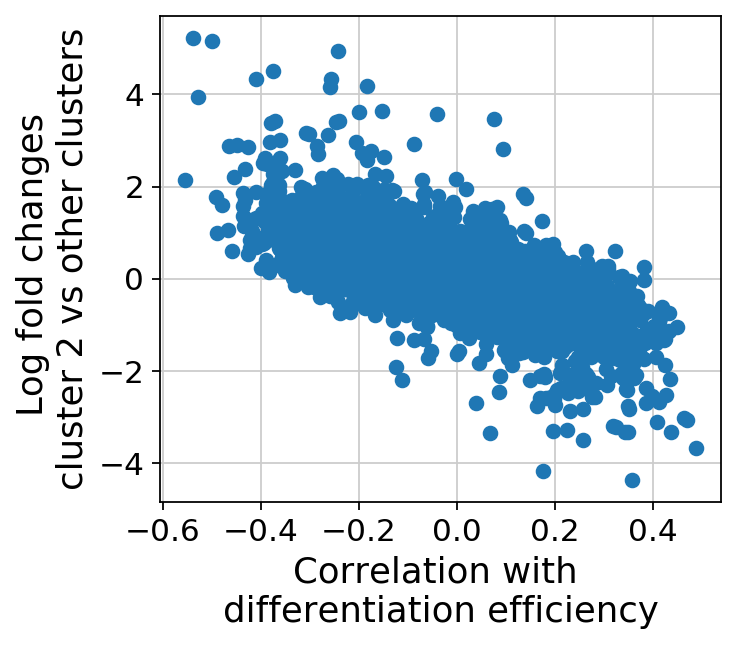

In [90]:
fig = figure(figsize=(4.5,4))
FS = 16

df = test_df.join(diff_expression_df.query('cluster_id=="2"').set_index('hgnc_symbol'),how='inner')
# df = df.query('pval<0.01')
print(df.head(5))

plot(df['coef'], df['logfoldchanges'], 'o')

xlabel('Correlation with \ndifferentiation efficiency', fontsize=FS)
ylabel('Log fold changes \ncluster 2 vs other clusters', fontsize=FS)

scipy.stats.pearsonr(df['coef'], df['logfoldchanges'])


           R
0   0.283683
1  0.0732407
2  -0.576347
3  0.0695829
4  0.0442056


Text(0, 0.5, 'Correlation of cluster markers\nwith differentiation efficiency')

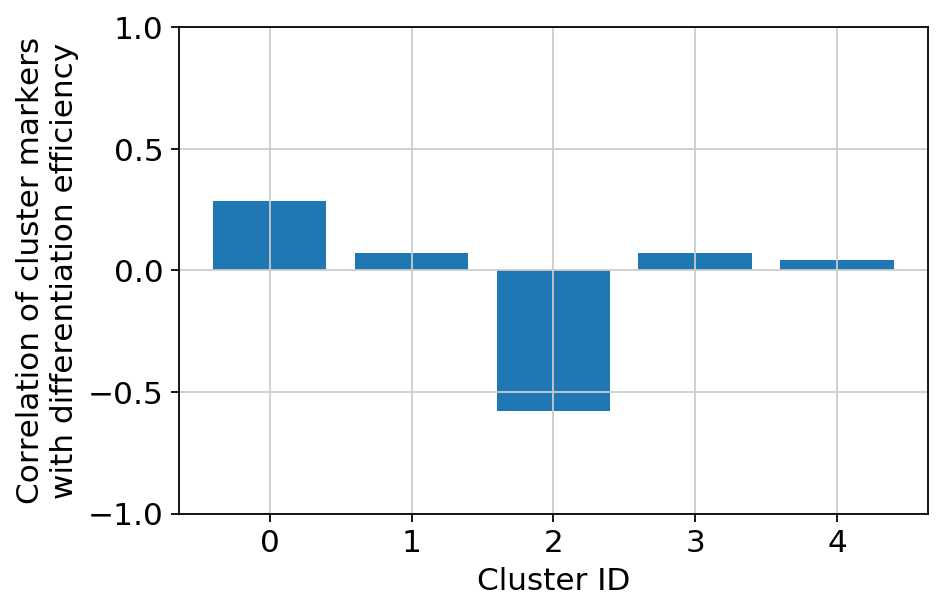

In [91]:
cross_corr_df = pd.DataFrame(index=group_names, columns=['R'])

for cluster_id in group_names:
    df = test_df.join(diff_expression_df.query('cluster_id==@cluster_id').set_index('hgnc_symbol'),how='inner')
    R,p = scipy.stats.pearsonr(df['coef'], df['scores'])
    cross_corr_df.loc[cluster_id, 'R'] = R
    
print(cross_corr_df)

bar(range(cross_corr_df.shape[0]), cross_corr_df['R'])
ylim([-1.0,1.0])
xlabel('Cluster ID')
ylabel('Correlation of cluster markers\nwith differentiation efficiency')

                 coef          pval      pval_adj                  names  \
hgnc_symbol                                                                
PDGFA       -0.554211  1.376734e-14  1.855149e-10  ENSG00000197461_PDGFA   
ZIC1        -0.539117  9.515179e-14  6.410852e-10   ENSG00000152977_ZIC1   
SP8         -0.528645  3.441941e-13  1.546005e-09    ENSG00000164651_SP8   
UTF1        -0.498850  1.058444e-11  3.412170e-08   ENSG00000171794_UTF1   
LMO3        -0.491255  2.407010e-11  5.405742e-08   ENSG00000048540_LMO3   

                    pvals     pvals_adj logfoldchanges   scores cluster_id  \
hgnc_symbol                                                                  
PDGFA        6.82748e-188  2.94921e-185        2.15049  31.2737          2   
ZIC1                    0             0        5.22355  44.3269          2   
SP8          1.64683e-172  4.74243e-170        3.94056  30.3183          2   
UTF1         4.88835e-309  1.37253e-305        5.16124  42.9523          2   

(-0.5763473335445516, 0.0)

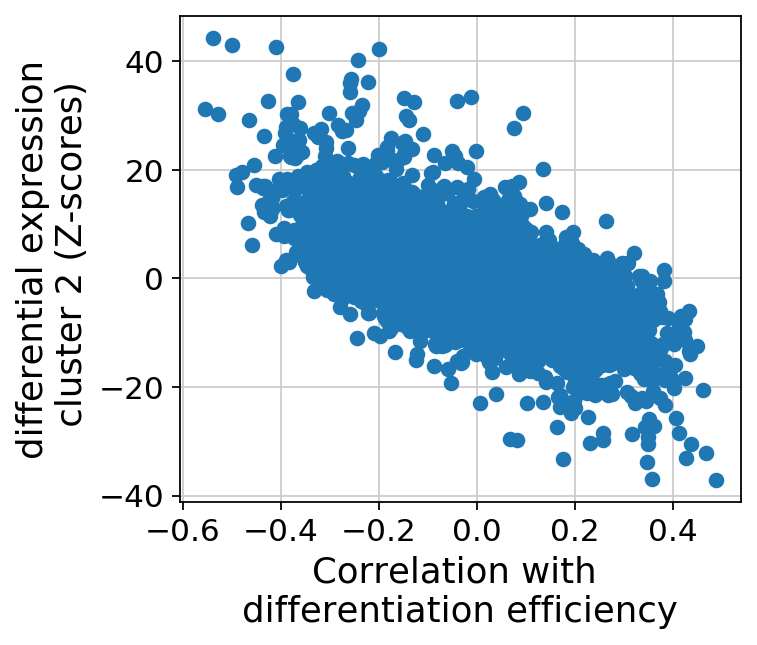

In [92]:
fig = figure(figsize=(4.5,4))
FS = 16

df = test_df.join(diff_expression_df.query('cluster_id=="2"').set_index('hgnc_symbol'),how='inner')
# df = df.query('pval<0.01')
print(df.head(5))

plot(df['coef'], df['scores'], 'o')

xlabel('Correlation with \ndifferentiation efficiency', fontsize=FS)
ylabel('differential expression\n cluster 2 (Z-scores)', fontsize=FS)

scipy.stats.pearsonr(df['coef'], df['scores'])
